In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import load_file

In [2]:
## Cargar los magics
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Abrir Dataset
Utilizar un url UCI para tal fin. Para este ejemplo utilizaremos el dataset Iris

In [2]:
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length','petal width', 'target'])
df = load_file.open_file()

In [18]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Explorar el dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal width,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
petal length,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
petal width,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
target,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
features = ['sepal length', 'sepal width', 'petal length','petal width']

x = df.loc[:,features].values

y = df.loc[:,['target']].values

## PCA necesita que los valores del dataset estén escalados
x = StandardScaler().fit_transform(x)

In [9]:
x = pd.DataFrame(x, columns=features)
x.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Aplicar el modelo
Para este caso, utilizaremos PCA para reducción de dimensionalidad. Si bien el problema da buenos resultados con n_components = 2, utilizaremos 4 componenetes para poder observar como los dos primeros capturan la mayor variabilidad.

In [10]:
##  Instanciamos PCA con 4 componentes
pca = PCA(n_components=4)

## Ajustamos el modelo
principalComponents = pca.fit_transform(x)

df_pca = pd.DataFrame(data= principalComponents, columns=['PC1', 'PC2','PC3','PC4'])

In [13]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [11]:
df_pca_final = pd.concat([df_pca, df.target], axis=1)

In [12]:
df_pca_final.head()

,PC1,PC2,PC3,PC4,target
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


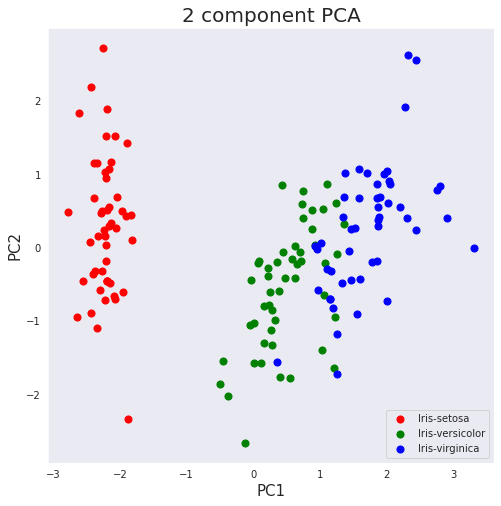

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca_final['target'] == target
    ax.scatter(df_pca_final.loc[indicesToKeep, 'PC1'],
               df_pca_final.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

In [17]:
pd.DataFrame({'Varianza':pca.explained_variance_ratio_})

,Varianza
0,0.727705
1,0.230305
2,0.036838
3,0.005152


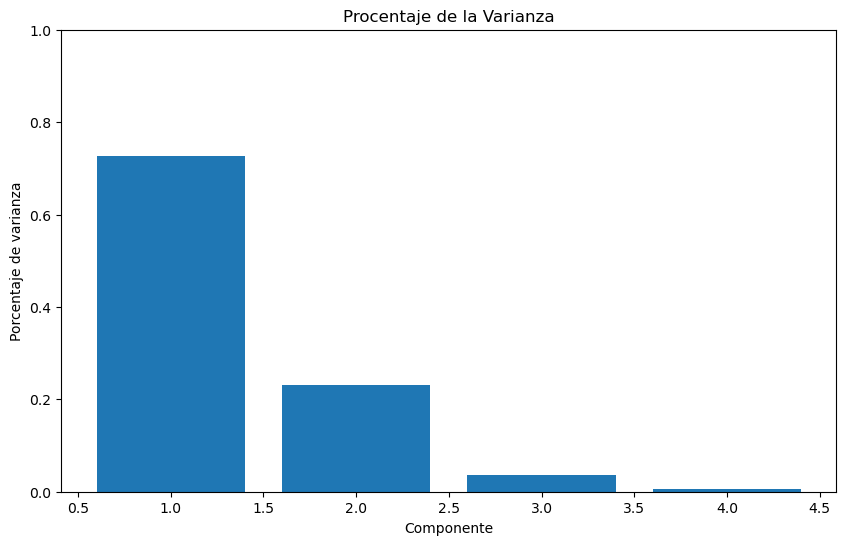

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x = np.arange(pca.n_components_) + 1,
       height=pca.explained_variance_ratio_
       )

ax.set_ylim(0,1)
ax.set_title('Procentaje de la Varianza')
ax.set_xlabel('Componente')
ax.set_ylabel('Porcentaje de varianza')
plt.show()

In [19]:
pca.explained_variance_ratio_.cumsum()

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

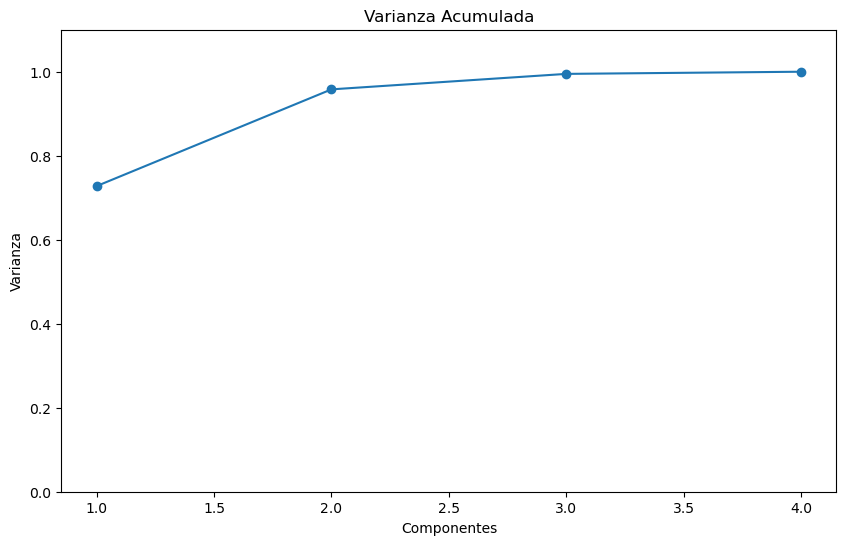

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.plot( np.arange(len(pca.components_))+ 1 ,
        pca.explained_variance_ratio_.cumsum(),
        marker = 'o'
        )

ax.set_ylim(0,1.1)
ax.set_title('Varianza Acumulada')
ax.set_ylabel('Varianza')
ax.set_xlabel('Componente principalsla')
plt.show()

## PIPELINE

In [3]:
from sklearn.pipeline import Pipeline

In [91]:
features = ['sepal length', 'sepal width', 'petal length','petal width']

x = df.loc[:,features].values

y = df.loc[:,['target']].values

In [88]:
def crear_dataframe():
    return pd.DataFrame()

In [89]:
pipe = Pipeline([
    ('pca', PCA(n_components=4)),
    ('escalar', StandardScaler())
])

In [90]:
pd.DataFrame(pipe.fit_transform(x))

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01,
        -2.30733235e-02],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01,
        -1.03208244e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02,
        -2.78252250e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02,
         6.63114622e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02,
         3.73972870e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02,
        -4.39877494e-03],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01,
         3.80965668e-02],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02,
         2.55051623e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01,
         2.67938291e-02],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01,
         3.99073035e-02],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01,
        -1.53011377e-02],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01,
      